lancer son fastbook

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 29.0 MB/s 
     |████████████████████████████████| 46 kB 5.0 MB/s 
     |████████████████████████████████| 189 kB 58.7 MB/s 
     |████████████████████████████████| 1.2 MB 58.1 MB/s 
     |████████████████████████████████| 56 kB 6.2 MB/s 
     |████████████████████████████████| 51 kB 420 kB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *

exemple de training sur des images pour reconnaitre les chats

In [6]:
#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.170794,0.023056,0.006089,00:56


epoch,train_loss,valid_loss,error_rate,time
0,0.072181,0.015806,0.005413,01:01


uploader pour charger une image de chat

In [7]:
#hide_output
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

exemple de commande de test

In [8]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 0.996638


commande pour faire des graphiques (je connaissais pas donc hop dans la poche)

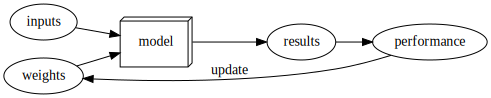

In [7]:
#hide_input
#caption Training a machine learning model
#id training_loop
#alt The basic training loop
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

In [8]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,2.753382,2.439850,00:02


epoch,train_loss,valid_loss,time
0,1.836946,1.325661,00:02
1,1.573823,1.220207,00:02
2,1.409576,0.966378,00:02
3,1.266816,0.972232,00:02
4,1.157752,0.794747,00:02
5,1.054047,0.723972,00:02
6,0.965575,0.686318,00:02
7,0.894195,0.678087,00:02


indiquer les resultats de cet exemple

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


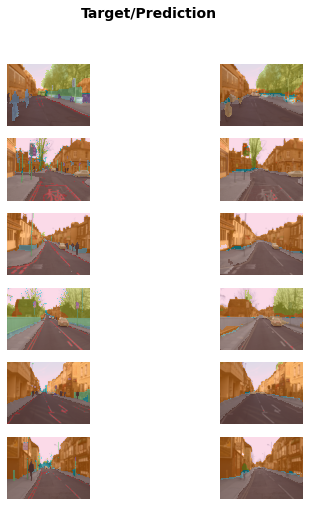

In [9]:
learn.show_results(max_n=6, figsize=(7,8))

exemple avec ENORMEMENT de data ~40min d'attente

pour pas charger trop de datas on peut ajouter 32 ou 16 a bs

In [3]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.474982,0.403641,0.821160,04:14


epoch,train_loss,valid_loss,accuracy,time
0,0.317894,0.351201,0.851040,08:30
1,0.255279,0.227097,0.911160,08:32
2,0.200461,0.180443,0.929160,08:32
3,0.135286,0.187407,0.931520,08:32


In [4]:
learn.predict("I really liked that movie!")

('pos', TensorText(1), TensorText([0.0030, 0.9970]))

commande pour donner la doc des commandes

In [5]:
doc(learn.predict)